In [7]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [8]:
google =yf.Ticker('GOOG')

In [9]:
df=google.history('5Y')

In [10]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-02-05 00:00:00-05:00,54.529999,55.500000,52.601501,52.790001,75966000,0.0,0.0
2018-02-06 00:00:00-05:00,51.359001,54.085499,51.156849,54.029999,68960000,0.0,0.0
2018-02-07 00:00:00-05:00,54.077000,54.089001,52.412998,52.429001,47384000,0.0,0.0
2018-02-08 00:00:00-05:00,52.770500,52.931000,50.033001,50.076000,57182000,0.0,0.0
2018-02-09 00:00:00-05:00,50.862499,52.198502,49.627998,51.889000,70118000,0.0,0.0


In [11]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [12]:
df.shape

(1259, 7)

In [13]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03,1259.0,1259.000000
mean,86.634905,87.627349,85.702216,86.676985,3.090887e+07,0.0,0.015886
std,31.046857,31.347587,30.711442,31.019004,1.338455e+07,0.0,0.563660
min,48.695000,50.176998,48.505501,48.811001,6.936000e+06,0.0,0.000000
25%,58.931499,59.405251,58.223499,58.849751,2.234500e+07,0.0,0.000000
50%,75.000000,75.881798,74.315498,75.433998,2.756600e+07,0.0,0.000000
75%,113.261749,114.805000,112.139000,113.317753,3.530400e+07,0.0,0.000000
max,151.863495,152.100006,149.887497,150.709000,1.241400e+08,0.0,20.000000


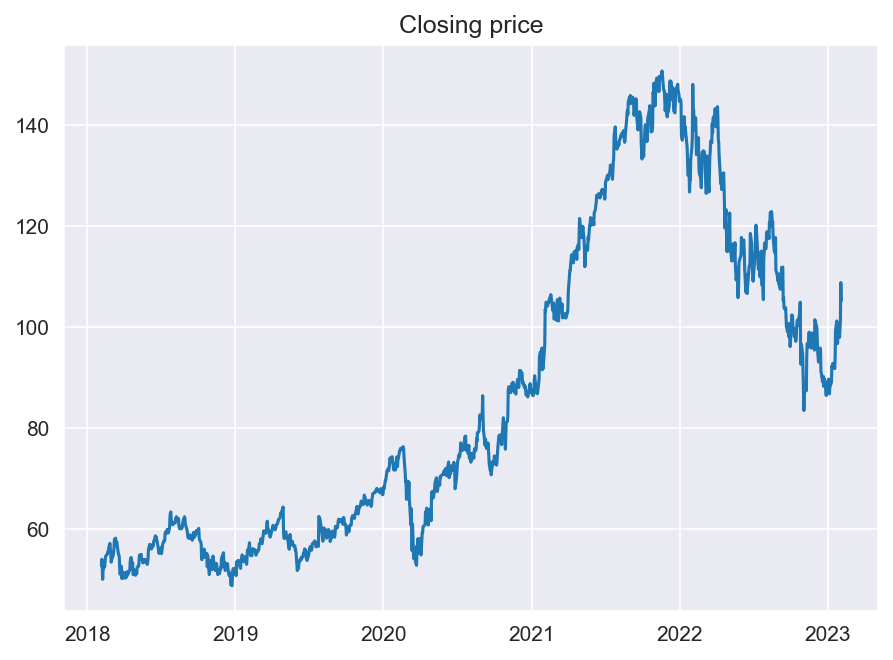

In [14]:
#overview of closing price
sns.set_style('darkgrid')
plt.figure(figsize=(7,5),dpi=150)
plt.title('Closing price')
plt.plot(df['Close'])

In [16]:
#calculating 50 DMA
df['fiftyDMA']= df['Close'].rolling(50).mean()

In [17]:
#calculating 200 DMA
df['twoDMA']= df['Close'].rolling(200).mean()

In [18]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,50DMA,fiftyDMA,twoDMA
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03,1259.0,1259.000000,1210.000000,1210.000000,1060.000000
mean,86.634905,87.627349,85.702216,86.676985,3.090887e+07,0.0,0.015886,87.166671,87.166671,88.335472
std,31.046857,31.347587,30.711442,31.019004,1.338455e+07,0.0,0.563660,30.955927,30.955927,30.393472
min,48.695000,50.176998,48.505501,48.811001,6.936000e+06,0.0,0.000000,52.442220,52.442220,55.610605
25%,58.931499,59.405251,58.223499,58.849751,2.234500e+07,0.0,0.000000,59.419455,59.419455,59.709823
50%,75.000000,75.881798,74.315498,75.433998,2.756600e+07,0.0,0.000000,76.276120,76.276120,74.624641
75%,113.261749,114.805000,112.139000,113.317753,3.530400e+07,0.0,0.000000,113.750300,113.750300,118.879604
max,151.863495,152.100006,149.887497,150.709000,1.241400e+08,0.0,20.000000,146.183850,146.183850,139.273730


In [19]:
df.drop(columns= ['50DMA','Dividends','Stock Splits'],inplace = True)

In [20]:
df.tail()

,Open,High,Low,Close,Volume,fiftyDMA,twoDMA
Date,,,,,,,
2023-01-30 00:00:00-05:00,98.745003,99.408997,97.519997,97.949997,24365100,94.1174,105.869078
2023-01-31 00:00:00-05:00,97.860001,99.910004,97.790001,99.870003,22306800,94.1350,105.716998
2023-02-01 00:00:00-05:00,99.739998,102.190002,98.419998,101.430000,26392600,94.1936,105.587883
2023-02-02 00:00:00-05:00,106.790001,108.820000,106.540001,108.800003,46622600,94.4136,105.492078
2023-02-03 00:00:00-05:00,103.510002,108.019997,103.300003,105.220001,36805900,94.6014,105.365523


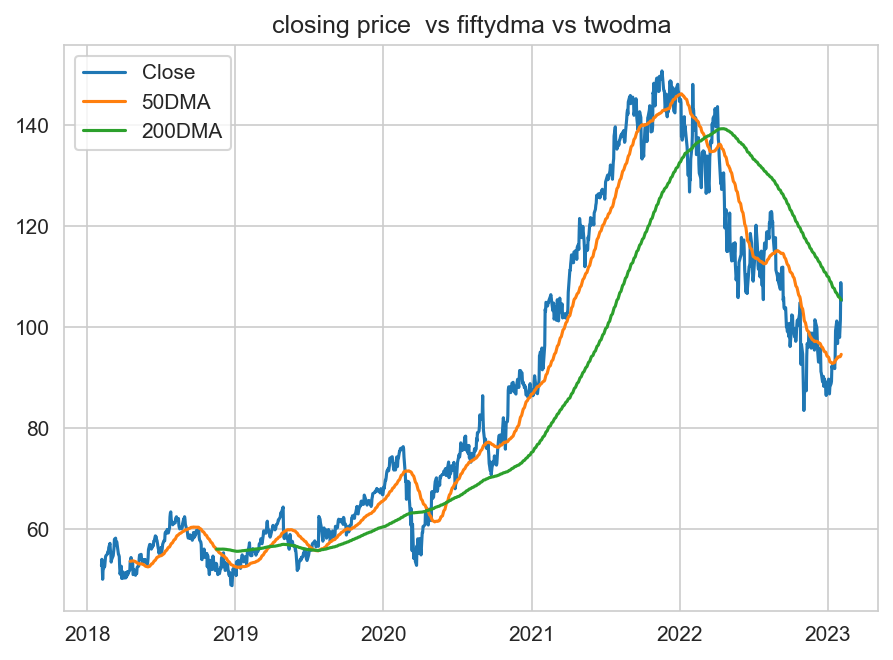

In [25]:
#plotting closing price,fiftydma,twodma
#if closing is price is above from 5oDMA and 200DMA line then it's uptrend.
#if closing is price is down from 5oDMA and 200DMA line then it's downtrend.
sns.set_style('whitegrid')
plt.figure(figsize=(7,5),dpi=150)
plt.title('closing price  vs fiftydma vs twodma')
plt.plot(df['Close'],label='Close')
plt.plot(df['fiftyDMA'],label='50DMA')
plt.plot(df['twoDMA'],label='200DMA')
plt.legend()

### Inferences from the above graph
1)if closing is price is above from 5oDMA and 200DMA line then it's uptrend.
2)if closing is price is down from 5oDMA and 200DMA line then it's downtrend.
3)everypoint 50DMA and 200DMA intersect, the market usually reverses its trend.

# finding the futuristic stock movements

<AxesSubplot:>

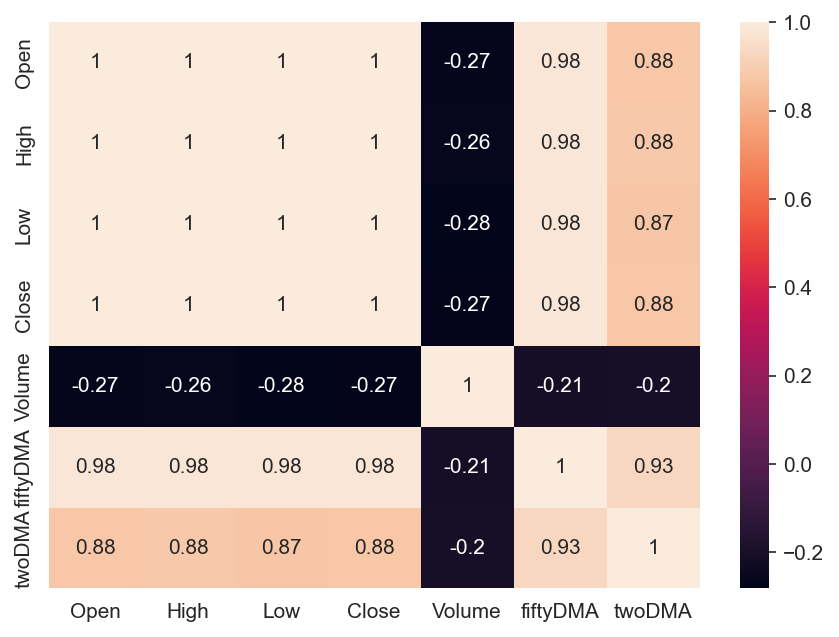

In [26]:
#analysing coerelation between each variables
plt.figure(figsize=(7,5),dpi=150)
sns.heatmap(df.corr(),annot=True)

### Inferences from the above graph
1.closing price has very high correlation with almost all the variables ecept the volume.
2.there is strong multi collinearity between the other variable as well.

<AxesSubplot:title={'center':'fiftyDMA'}, xlabel='fiftyDMA', ylabel='Density'>

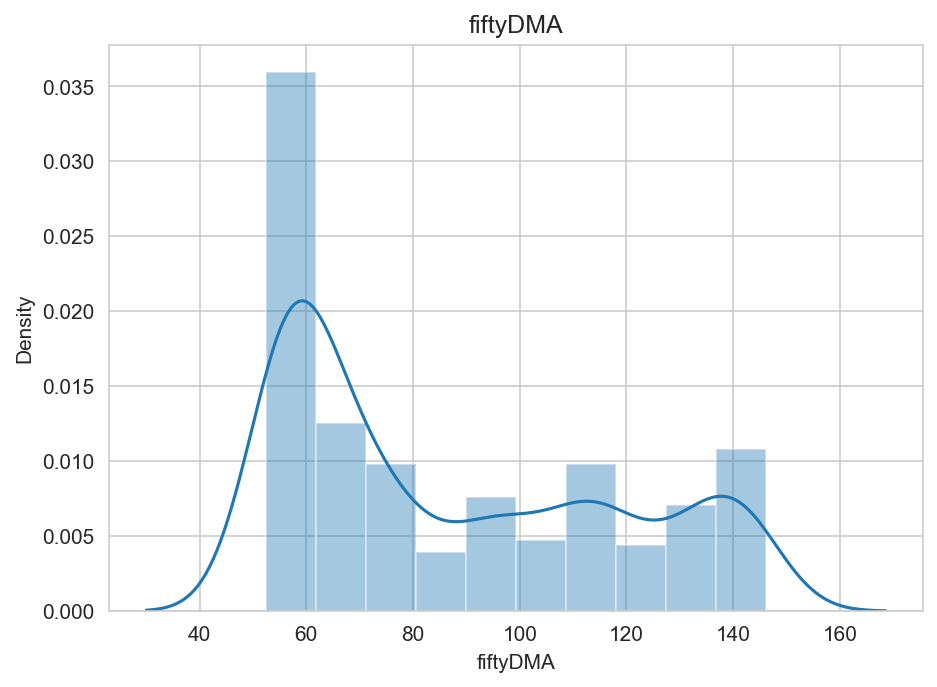

In [27]:
#ploting distplot of 50DMA(day moving  average)
sns.set_style('whitegrid')
plt.figure(figsize=(7,5),dpi=150)
plt.title('fiftyDMA')
sns.distplot(df['fiftyDMA'])

<AxesSubplot:title={'center':'closing price'}, xlabel='Close', ylabel='Density'>

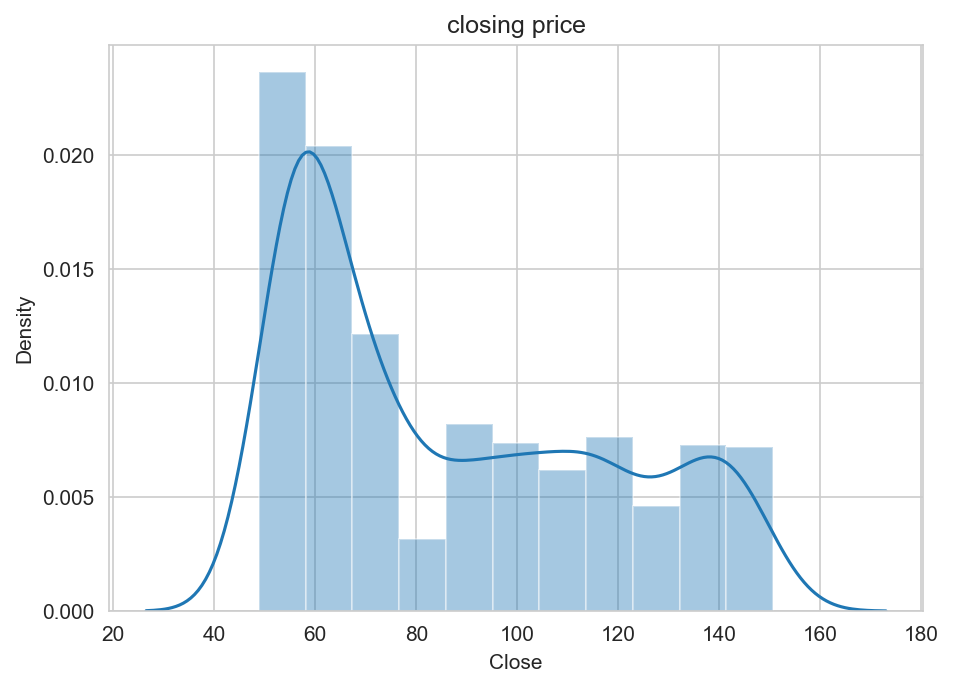

In [28]:
#ploting distplot of closing price
sns.set_style('whitegrid')
plt.figure(figsize=(7,5),dpi=150)
plt.title('closing price')
sns.distplot(df['Close'])

### Inferences from above two diagram
1)distribution is same for both graphs or(columns)

In [29]:
import statsmodels.formula.api as smf

In [30]:
model=smf.ols(formula = 'Close ~ fiftyDMA', data = df)
model = model.fit()

In [31]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                 3.163e+04
Date:                Sat, 04 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:30:57   Log-Likelihood:                -3869.6
No. Observations:                1210   AIC:                             7743.
Df Residuals:                    1208   BIC:                             7753.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6165      0.510      5.135      0.000       1.617       3.616
fiftyDMA       0.9797      0.006    177.848      0.000       0.969       0.991
==============================================================================
Omnibus:                       65.695   Durbin-Watson:                   0.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.360
Skew:                          -0.567   Prob(JB):                     2.62e-17
Kurtosis:                       3.476   Cond. No.                         277.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Inferences from the summary
1. good r2 scores and coef
2. since they are very highly correlated, ~1, it isn't wise to fit the model based on the paramenter in real life.

In [32]:
model1=smf.ols(formula = 'Close ~ twoDMA', data = df)
model1 = model1.fit()

In [33]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     3540.
Date:                Sat, 04 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:32:52   Log-Likelihood:                -4348.5
No. Observations:                1060   AIC:                             8701.
Df Residuals:                    1058   BIC:                             8711.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.5824      1.384     10.540      0.000      11.868      17.297
twoDMA         0.8812      0.015     59.495      0.000       0.852       0.910
==============================================================================
Omnibus:                       50.388   Durbin-Watson:                   0.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.685
Skew:                           0.329   Prob(JB):                     2.94e-08
Kurtosis:                       2.406   Cond. No.                         287.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Inferences from the summary
1. good r2 scores and coef
2. since they are very highly correlated, ~1, it isn't wise to fit the model based on the paramenter in real life.